In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
#introducing the URL for the Url and API_key from the website
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# city data list
city_data = []

print("Success Retrieving Data")
print("-----------------------------")

# counters for cities
record_count = 1
set_count = 1

# categorizing the cities into set 
for i, city in enumerate(cities):
        
    # group cities
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # log data
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # increase record count 
    record_count += 1

    try:
        # json data parsed and retrieved
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # add to city list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #skip city(error)
    except:
        print("Skipped.")
        pass
              
# data is finished loading
print("-----------------------------")
print("Data Load Complete     ")
print("-----------------------------")

Success Retrieving Data
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | verkhniy landekh
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | scottsbluff
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | novosibirsk
Processing Record 12 of Set 1 | sambava
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | emirdag
Processing Record 17 of Set 1 | illoqqortoormiut
Skipped.
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | sechura
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | saint-andre-avellin
Processing R

Processing Record 43 of Set 4 | baghdad
Processing Record 44 of Set 4 | raga
Skipped.
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | hualmay
Processing Record 47 of Set 4 | dilla
Processing Record 48 of Set 4 | sataua
Skipped.
Processing Record 49 of Set 4 | kartuzy
Processing Record 0 of Set 5 | mao
Processing Record 1 of Set 5 | richards bay
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | bolungarvik
Skipped.
Processing Record 5 of Set 5 | mandera
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | idukki
Processing Record 8 of Set 5 | colares
Processing Record 9 of Set 5 | along
Processing Record 10 of Set 5 | nakusp
Processing Record 11 of Set 5 | airai
Processing Record 12 of Set 5 | zhezkazgan
Processing Record 13 of Set 5 | tashla
Processing Record 14 of Set 5 | meulaboh
Processing Record 15 of Set 5 | udachnyy
Processing Record 16 of Set 5 | skibbereen
Process

Processing Record 40 of Set 8 | mandalgovi
Processing Record 41 of Set 8 | pierre
Processing Record 42 of Set 8 | felidhoo
Skipped.
Processing Record 43 of Set 8 | bur gabo
Skipped.
Processing Record 44 of Set 8 | alta floresta
Processing Record 45 of Set 8 | uk
Skipped.
Processing Record 46 of Set 8 | wulanhaote
Skipped.
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | ekuvukeni
Processing Record 49 of Set 8 | moree
Processing Record 0 of Set 9 | dingle
Processing Record 1 of Set 9 | boueni
Processing Record 2 of Set 9 | auki
Processing Record 3 of Set 9 | ostrovnoy
Processing Record 4 of Set 9 | sorong
Processing Record 5 of Set 9 | russell
Processing Record 6 of Set 9 | rosetta
Processing Record 7 of Set 9 | leh
Processing Record 8 of Set 9 | qarqin
Processing Record 9 of Set 9 | college
Processing Record 10 of Set 9 | miri
Processing Record 11 of Set 9 | half moon bay
Processing Record 12 of Set 9 | mosquera
Processing Record 13 of Set 9 | rocha
Processing Reco

Processing Record 35 of Set 12 | ovre ardal
Processing Record 36 of Set 12 | diego de almagro
Processing Record 37 of Set 12 | pombas
Processing Record 38 of Set 12 | maceio
Processing Record 39 of Set 12 | razole
Processing Record 40 of Set 12 | nouadhibou
Processing Record 41 of Set 12 | palmer
Processing Record 42 of Set 12 | zarubino
Processing Record 43 of Set 12 | guarapari
Processing Record 44 of Set 12 | vila velha
Processing Record 45 of Set 12 | lakota
Processing Record 46 of Set 12 | machiques
Processing Record 47 of Set 12 | mormugao
Skipped.
Processing Record 48 of Set 12 | usolye
Processing Record 49 of Set 12 | san buenaventura
Processing Record 0 of Set 13 | hambantota
Processing Record 1 of Set 13 | shymkent
Processing Record 2 of Set 13 | panaba
Processing Record 3 of Set 13 | ranong
Processing Record 4 of Set 13 | naze
Processing Record 5 of Set 13 | qinzhou
Processing Record 6 of Set 13 | gotsu
Processing Record 7 of Set 13 | angra
Skipped.
Processing Record 8 of Se

In [9]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,husavik,50.56,-96.99,10.00,69,17,4.00,CA,1573427941
1,hobart,-42.88,147.33,61.00,54,100,10.29,AU,1573427819
2,castro,-42.48,-73.76,59.00,72,99,6.93,CL,1573427737
3,mahebourg,-20.41,57.70,71.01,94,40,8.05,MU,1573427930
4,hermanus,-34.42,19.24,66.00,86,63,11.99,ZA,1573428060
5,verkhniy landekh,56.84,42.60,37.87,96,100,10.85,RU,1573428060
6,margate,-43.03,147.26,61.00,54,100,10.29,AU,1573427989
7,puerto ayora,-0.74,-90.35,75.20,69,40,4.70,EC,1573427925
8,scottsbluff,41.87,-103.67,32.00,86,90,25.28,US,1573427807
9,yulara,-25.24,130.99,77.00,7,42,5.82,AU,1573427919


In [14]:
#output file
output_data_file='cities.csv'
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [15]:
#plot Latitude vs Temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
#import time
import time

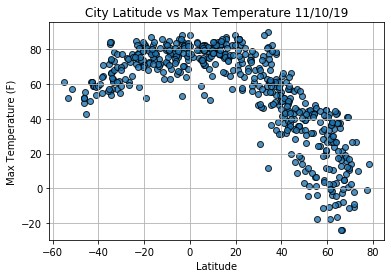

In [24]:
#plot Latitude vs Temperature

plt.scatter(lats,max_temps,edgecolor='black',linewidths=1,marker="o",alpha=0.8,label="cities")
plt.title(f"City Latitude vs Max Temperature "+ time.strftime( "%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig1.png")

plt.show()

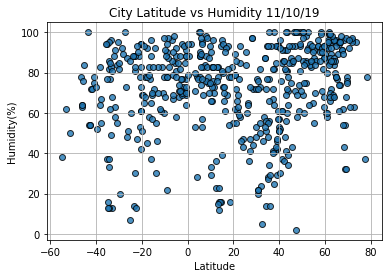

In [25]:
#plot Latitude vs Humidity
plt.scatter(lats,humidity,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='cities')
plt.title(f"City Latitude vs Humidity "+ time.strftime( "%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig2.png")

plt.show()

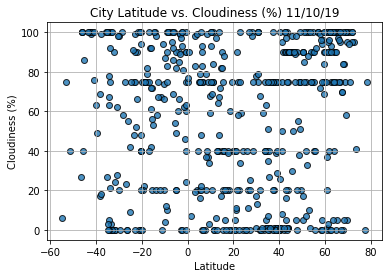

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

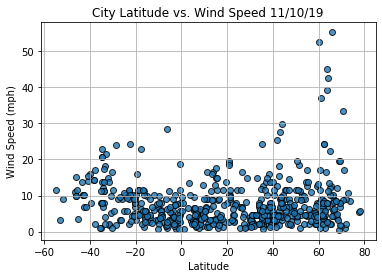

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,wind_speed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [33]:
#Linear Regression import
from scipy.stats import linregress
import matplotlib.pyplot as plt
#create an equal number of Latitudes and temperature
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]
(slope,intercept,r_value,p_value,std_err)=linregress(lats,temps)
line_eq="y="+str(round(slope,2))+"x + "+str(round(intercept,2))
print(line_eq)
print(f"The p-value is :{p_value:.3f}")

y=-0.45x + 92.94
The p-value is :0.011


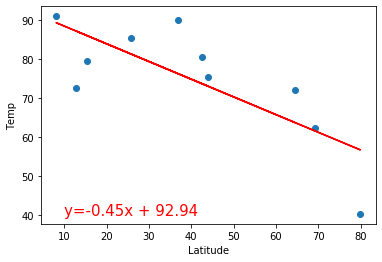

In [39]:
regress_values=[(lat*slope+intercept) for lat in lats]
import matplotlib.pyplot as plt
plt.scatter(lats,temps)
plt.plot(lats,regress_values,"r")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [47]:
#linear Regression Function

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

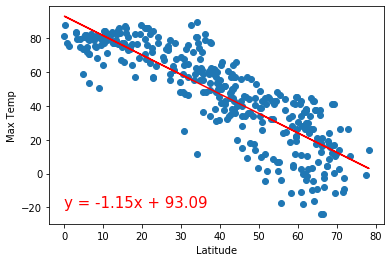

In [51]:
## Creater a Nothern and Southern DataFrame
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]
##find the linear regression of latitude and temperature
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#plotting the scatter plot and linear regression line of Northern Hemisphere(Temperature vs Latitude)
plot_linear_regression(x_values,y_values,"Linear Regression on the Nothern Hemisphere , Temperature versus Latitude","Max Temp",(0,-20))

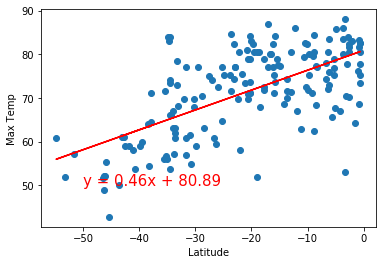

In [55]:
#plotting the scatter plot and linear regression line of Southern Hemisphere(Temperature vs Latitude)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,50))

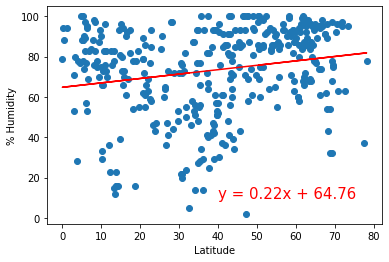

In [56]:
#Northern Hemisphere Humidity vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


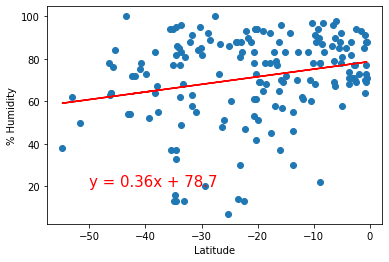

In [58]:
#Southern Hemisphere Humidity vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(-50,20))


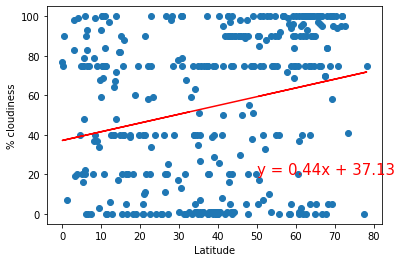

In [62]:
#Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% cloudiness',(50,20))


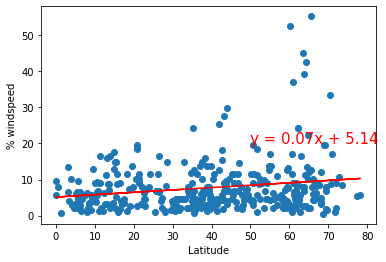

In [63]:
#Perform Linear Regression on the Wind speed for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],'Linear Regression on the Northern Hemisphere \n for wind Speed', '% windspeed',(50,20))


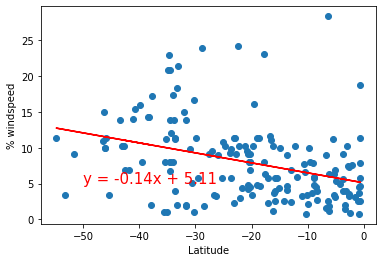

In [65]:
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],'Linear Regression on the Northern Hemisphere \n for wind Speed', '% windspeed',(-50,5))


In [9]:
#import the dependecies
import pandas as pd
import gmaps
import requests

from config1 import g_key

In [10]:
city_data_df=pd.read_csv("cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,husavik,50.56,-96.99,10.00,69,17,4.00,CA,1573427941
1,1,hobart,-42.88,147.33,61.00,54,100,10.29,AU,1573427819
2,2,castro,-42.48,-73.76,59.00,72,99,6.93,CL,1573427737
3,3,mahebourg,-20.41,57.70,71.01,94,40,8.05,MU,1573427930
4,4,hermanus,-34.42,19.24,66.00,86,63,11.99,ZA,1573428060


In [16]:
city_data_df.dtypes

City_ID         int64
City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [17]:
gmaps.configure(api_key=g_key)

In [20]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations,max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

InvalidWeightException: -0.73 is not a valid weight. Weights must be non-negative.

In [15]:
fig=gmaps.figure(center=(30.0,31.0),zoom_level=1.5)